In [1]:
%tensorflow_version 1.x
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, concatenate, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras.callbacks import EarlyStopping
from keras.layers.core import SpatialDropout2D
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
np.random.seed(101)

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [0]:
filelist_trainx = sorted(glob.glob('/content/drive/My Drive/input/annotation/*.jpg'), key=numericalSort)
X_train = np.array([np.array(Image.open(fname)) for fname in filelist_trainx])

# for i in range(len(filelist_trainx)):
# X_train = np.array([np.array(Image.open(fname)) for fname])

# filelist_trainy_in = sorted(glob.glob('/content/drive/My Drive/input/dgu_trainy_in/*.jpg'), key=numericalSort)
# filelist_trainy_out = sorted(glob.glob('/content/drive/My Drive/input/dgu_trainy_out/*.jpg'), key=numericalSort)
# Y_train_in = np.array([np.array(Image.open(fname)) for fname in filelist_trainy_in])
# Y_train_out = np.array([np.array(Image.open(fname)) for fname in filelist_trainy_out])

In [0]:
def resizeX(filename, size = (224,224)):
    im = Image.open(filename)
    im_resized = im.resize(size)
    return (im_resized)

def resizeY(filename, size = (224,224)):
    im = Image.open(filename)
    im_resized = im.resize(size)
    return (im_resized)

    
def addImage(filename1, filename2, countt):
    size = (224,224)
    im = cv2.imread(filename1)
    im2 = cv2.imread(filename2)
    result = cv2.add(im/2,im2/2)
    im_added = cv2.resize(result, size)
    plt.imshow(im_added)
    cv2.imwrite('/content/drive/My Drive/sibal/' + (str)(countt+1) + '.jpg',im_added)
    return (im_added)

In [0]:
X_train_ph2_resized = []
Y_train_ph2_resized = []
addedImage = []

for i in range(len(filelist_trainx)):
    X_train_ph2_resized.append(resizeX(filelist_trainx[i]))
    # Y_train_ph2_resized.append(resizeY(filelist_trainy[i]))  
    # addedImage.append(addImage(filelist_trainy_in[i],filelist_trainy_out[i], i))

In [0]:
# del(X_train)
# del(Y_train)

X_train = np.array([np.array(img) for img in X_train_ph2_resized])
# Y_train = np.array([np.array(img) for img in Y_train_ph2_resized])
addY = np.array([np.array(img) for img in addedImage])

IndexError: ignored

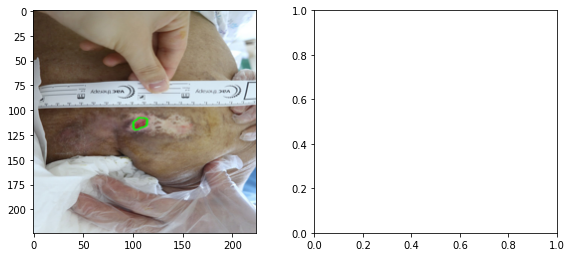

In [7]:
# print(Y_train[0].shape)
# print(len(Y_train))
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(X_train[0])
plt.subplot(2,4,2)
plt.imshow(addY[0])

In [0]:
for i in range(len(X_train)):
  plt.imsave('/content/drive/My Drive/output/dgu_trainx_resized/' + str(i + 41) + '.jpg', X_train[i])
  # plt.imsave('/content/drive/My Drive/output/dgu_trainy_resized/' + str(i + 41) + '.jpg', Y_train[i])